# Homework # 4 Naive BAYES Classifier

## Rob Taylor - Spring 2025
## Sharon Lynch Grey and I share ideas, but not verbatim code.

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [6]:
print("\nShape BEFORE: ", df.shape, " <<<<<<<<<<<<<<<\n\n")

df.info()
df.head(10)


Shape BEFORE:  (768, 9)  <<<<<<<<<<<<<<<


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [8]:
df = df.drop('Pregnancies', axis=1)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [10]:
print("\nShape AFTER: ", df.shape, " <<<<<<<<<<<<<<<\n\n")
df.info()
df.head(10)


Shape AFTER:  (768, 8)  <<<<<<<<<<<<<<<


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.600,0.627,50,1
1,85,66,29,0,26.600,0.351,31,0
2,183,64,0,0,23.300,0.672,32,1
3,89,66,23,94,28.100,0.167,21,0
4,137,40,35,168,43.100,2.288,33,1
5,116,74,0,0,25.600,0.201,30,0
6,78,50,32,88,31.000,0.248,26,1
7,115,0,0,0,35.300,0.134,29,0
8,197,70,45,543,30.500,0.158,53,1
9,125,96,0,0,0.000,0.232,54,1


Step 5 - Write code to clean data

In [12]:
# Count NaN for all columns
nan_counts = df.isna().sum()
print("Columns with NaN values:")
print(nan_counts[nan_counts > 0])

Columns with NaN values:
Series([], dtype: int64)


In [13]:
# OK - that didn't work... Count zeros 
zero_counts = (df == 0).sum()
print("Columns with zero values:")
print(zero_counts[zero_counts > 0])


Columns with zero values:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [14]:
# Replace 0 values with mean value for columns listed (not Outcome, that's the result!)
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# for small data sets, a for loop works. And for me, this is very readable. 
for col in columns_to_clean:
    df[col] = df[col].replace(0, df[col].mean())

## Howeer, I found a mask is more efficient for larger datasets: 
#  df[columns_to_clean] = df[columns_to_clean].mask(df[columns_to_clean] == 0, df[columns_to_clean].mean())

print("\nAFTER:\n")
print(df.isnull().sum())


AFTER:

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [90]:
# 20% test size and 80% train size.
inputs = df.drop('Outcome', axis=1)
target = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("\nTotal Samples: ", len(inputs))

# Print shapes of train and test sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print(f"\nTraining Data: {(len(X_train) / len(inputs) * 100):.2f}%")
print(f"Testing Data:  {(len(X_test) / len(inputs) * 100):.2f}%")


Total Samples:  768

Training set shape: (614, 7) (614,)
Testing set shape: (154, 7) (154,)

Training Data: 79.95%
Testing Data:  20.05%


#### **Step #7: Initialize your model**




In [18]:
# using the Gaussian Naive Bayes model.
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [20]:
model.fit(X_train, y_train)

GaussianNB()

Step 9 - Predict using model on test data

In [22]:
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [24]:
# I'm not sure how these differ, but they came out the same in this case.
score = model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Score: {score:.3f} Accuracy: {accuracy:.3f}")

Score: 0.753 Accuracy: 0.753


Step 11 - Confusion Matrix

In [26]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_pred)

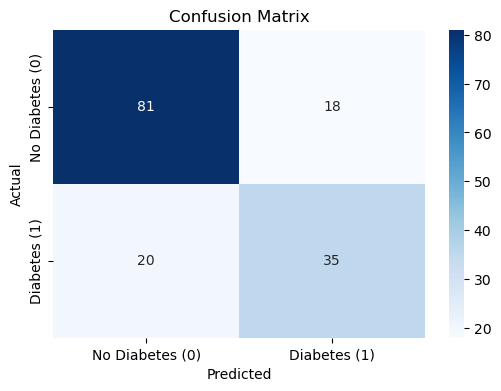

In [27]:
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'], 
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix Results
* True Negatives (TN): 81 cases correctly predicted as no diabetes
* False Positives (FP): 18 cases incorrectly predicted as diabetes
* False Negatives (FN): 20 cases incorrectly predicted as no diabetes
* True Positives (TP): 35 cases correctly predicted as diabetes

Interpretation
* High TN: The model is good at identifying non-diabetic cases.
* High TP: The model is effective at detecting diabetic cases.
* High FP: The model seems to over-predict diabetes, which I would rather be safe than sorry. So long as I'm not to the point of having to stick needles in my belly based on a prediction. I am content to know I may be at risk.
* High FN: The model is failing to hit all diabetic cases. In medical situations, this is bad because early detection typically helps.

In [60]:
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print(report)

              precision    recall  f1-score   support

 No Diabetes       0.80      0.82      0.81        99
    Diabetes       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Precision:
* No Diabetes: 80% of predicted "no diabetes" were actually correct.
* Diabetes: 66% of predicted "diabetes" cases were correct.

Recall (Sensitivity or True Positive Rate):
* No Diabetes: 82% of actual "no diabetes" cases were correctly identified.
* Diabetes: 64% of actual "diabetes" cases were detected — important in medical diagnosis to avoid missed cases.

F1-Score: 
* Harmonic mean of precision and recall — balances both.

Accuracy:
* 75% of all predictions were correct.

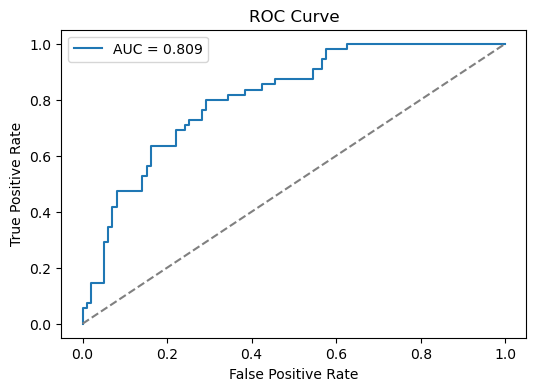

In [65]:
# ROC & AUC 
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

* A curve that hugs the top-left corner means:
  * High TPR (the model is correctly identifying most positives).
  *  Low FPR (the model is making few false positive errors).


* With this AUC, there's an 80.9% chance the model will rank a randomly chosen positive instance (diabetic) higher than a randomly chosen negative instance (non-diabetic). Which is considered "Good" 

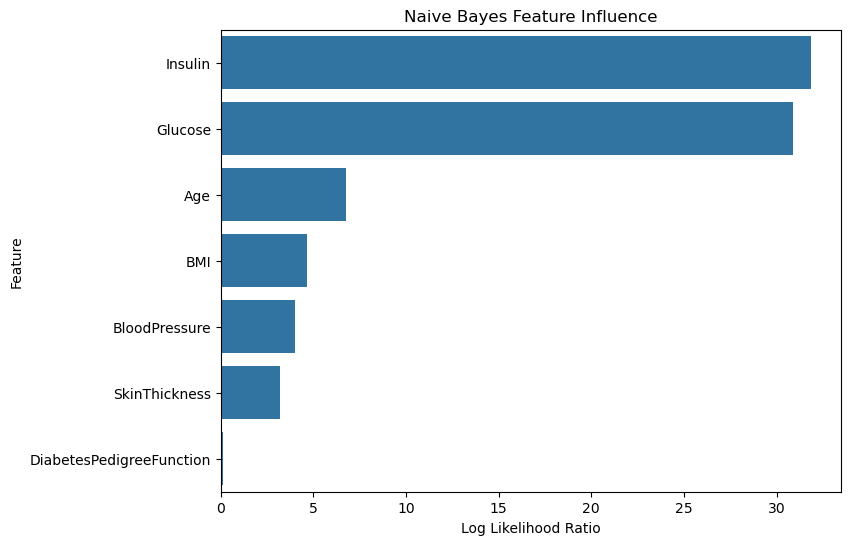

In [54]:
# Feature Importance, I like this one:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Log Likelihood Ratio': model.theta_[1] - model.theta_[0]
}).sort_values(by='Log Likelihood Ratio', key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Log Likelihood Ratio', y='Feature')
plt.title('Naive Bayes Feature Influence')
plt.show()